# 0. Hands on Reinforcement Learning

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt # to plot histogram

## Play with the environment

In [1]:
import gym # import the gym package
env = gym.make('FrozenLake-v0') # load the env

To reset the environment:

In [2]:
# reset the env and returns the start state
s = env.reset()

To render an environment:

In [4]:
env.render()


SFFF
FHFH
FFFH
HFFG


To see the number of states/actions:

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


To retrieve the integer values:

In [7]:
print(env.action_space.n)
print(env.observation_space.n)

4
16


For the `FrozenLake-v0` you can also use:

In [8]:
print(env.env.nA)
print(env.env.nS)

4
16


To let our agent executes an action $a$:

In [10]:
# execute action 2 in state 0 (because we reset the environment)
next_state, reward, terminate, probability = env.step(2)
print("next state we reached:", next_state)
print("immediate reward collected:", reward)
print("Is this a terminal state?", terminate)
print("Probability that we actually execute action a:", probability)

next state we reached: 4
immediate reward collected: 0.0
Is this a terminal state? False
Probability that we actually execute action a: {'prob': 0.3333333333333333}


To randomly sample an action from the set of actions:

In [14]:
a = env.action_space.sample()
print(a)

3


[28, 24, 21, 27]


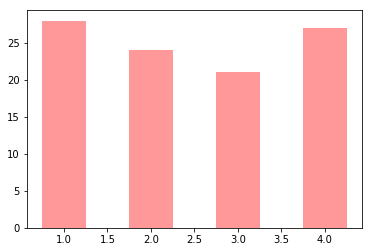

In [26]:
# sample 100 actions randomly and display the histogram
res = [0] * env.action_space.n
for _ in range(100):
    res[env.action_space.sample()] += 1
print(res)
_ = plt.bar([1,2,3,4], res, width=0.5, color='r', alpha=0.4)

To retrieve all the informations available in the
action-state $(s,a)$:

In [27]:
# example with state=0, action=0
env.env.P[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False)]

Another example:

In [28]:
# another example with state=14, action=1
env.env.P[14][1]

[(0.3333333333333333, 13, 0.0, False),
 (0.3333333333333333, 14, 0.0, False),
 (0.3333333333333333, 15, 1.0, True)]

for each value in the array, we can read it as follow:
When we execute action $1$ in state $14$:
- with probability $1/3$ we end in state $13$ and we get an immediate reward of $0.0$. $13$ is not a terminal state (False)
- with probability $1/3$ we end in state $14$ and we get an immediate reward of $0.0$. $13$ is not a terminal state (False)
- with probability $1/3$ we end in state $15$ and we get an immediate reward of $1.0$. $13$ is not a terminal state (True)

##  Customize the environment

To load and register a new environment:

In [29]:
from gym.envs.registration import register
register(
    id='Deterministic-4x4-FrozenLake-v0', # name given to this new environment
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv', # env entry point
    kwargs={'map_name': '4x4', 'is_slippery': False} # argument passed to the env
)

We can load this newly environment using:

In [31]:
env = gym.make('Deterministic-4x4-FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


To see that the tiles are non slippery we can check that, now, the probability is $1.0$ (probability that our agent actually executes the action we tell him to):

In [33]:
# for example check it for state-action pair (0,0)
env.P[0][0]

[(1.0, 0, 0.0, False)]

To load the $8 \times 8$ map:

In [34]:
# we specified 'map_name': '8x8'
register(
    id='Deterministic-8x8-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '8x8', 'is_slippery': False})

In [36]:
# we can see that our new environment is a 8x8 grid
env = gym.make("Deterministic-8x8-FrozenLake-v0")
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


To define our own grid, we just need to define an array and pass it for the key 'desc' (desc means description):

In [37]:
my_desc = [
    "SFFFF",
    "FHFHH",
    "FHFFH",
    "HHFFG"
]

register(
    id='Stochastic-5x5-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'desc': my_desc, 'is_slippery': True})

In [38]:
# We can check that our environment is our own 5x5 grid
env = gym.make('Stochastic-5x5-FrozenLake-v0')
env.render()


SFFFF
FHFHH
FHFFH
HHFFG


To customize even more our environment (change the value of the reward, the transition probabilities...) we can create a class that inherits from our environment (here `gym.envs.toy_text.frozen_lake.FrozenLakeEnv`). Our class should be defined inside a python file (take a look at the file `my_env.py`). Once our class is created we just need to pass it to the `entry_point` parameter of the `register` function:

In [44]:
import my_env # import my python file that contains CustomizedFrozenLake class that inherits from FrozenLake

register(
    id='Stochastic-8x8-CustomizedFrozenLake-v0',
    entry_point='my_env:CustomizedFrozenLake',
    kwargs={'map_name': '8x8', 'is_slippery': True})

In [45]:
env = gym.make('Stochastic-8x8-CustomizedFrozenLake-v0')
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


To check that the reward effectively changed (it should be 10 in the goal state and -5 in the reward state), we can just, for example, display the state just before the final state (state 62). The final state (state 63 is the goal state):

In [47]:
# we can see that, if we reach state 63, we receive reward=10
env.P[62][1]

[(0.3333333333333333, 61, 0, False),
 (0.3333333333333333, 62, 0, False),
 (0.3333333333333333, 63, 10, True)]